#### ÏàòÏ†ï & Î≥¥ÏôÑ Î∂ÄÎ∂Ñ
- Ïö∞ÏÑ† MonetaryÎ•º Íµ¨Ìï† Îïå, quantityÍ∞Ä ÏùåÏàòÏù∏ Í≤ΩÏö∞ÎèÑ Ìè¨Ìï®Îêú Í≤∞Ï†ú Ï†ïÎ≥¥Î•º Î∂àÎü¨Ïò§Îêò, ÏùåÏàòÎäî 0ÏúºÎ°ú ÏπòÌôòÌïòÍ≥†
  quantity * price Î°ú Í∞íÏùÑ Íµ¨ÌïúÎã§.
- agg Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú RecencyÏôÄ FrequencyÎ•º ÌïúÎ≤àÏóê Íµ¨ÌïúÎã§.
- Í≤∞Î°† : Monetary ÏôÄ Recency, FrequencyÎ•º Îî∞Î°úÎî∞Î°ú Íµ¨ÌïúÎã§.

### RFM Î∂ÑÏÑù Ïã§Ïäµ
- Recency: ÏñºÎßàÎÇò ÏµúÍ∑ºÏóê Íµ¨Îß§ÌñàÎäîÍ∞Ä
- Frequency: ÏñºÎßàÎÇò ÏûêÏ£º Íµ¨Îß§ÌñàÎäîÍ∞Ä
- Monetary: ÏñºÎßàÎÇò ÎßéÏùÄ Í∏àÏï°ÏùÑ ÏßÄÏ∂úÌñàÎäîÍ∞Ä

### Í≥†Í∞ù Î∂ÑÏÑù
- InvoiceNo: Í±∞Îûò Î≤àÌò∏
- StockCode: ÏÉÅÌíà ÏΩîÎìú
- Description: ÏÉÅÌíàÎ™Ö 
- InvoiceDate: Í±∞Îûò ÎÇ†Ïßú
- UnitPrice: ÏÉÅÌíà Îã®Í∞Ä
- CustomerID: Í≥†Í∞ù Î≤àÌò∏
- Country: Íµ≠Í∞ÄÎ™Ö

In [1]:
import pandas as pd
import numpy as np

co_df = pd.read_csv('./datasets/customer_invoice_data.csv')
co_df.info()
co_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

In [2]:
co_df.columns = ['invoice', 'code', 'description', 'quantity','date' ,'price', 'id','country']

In [3]:
co_df

invoice    code                          description  quantity  \
0       536365  85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365   71053                  WHITE METAL LANTERN         6   
2       536365  84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365  84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365  84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...     ...                                  ...       ...   
541904  581587   22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905  581587   22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587   23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587   23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587   22138        BAKING SET 9 PIECE RETROSPOT          3   

                   date  price       id         country  
0        12/1/2010 8:26   2.55  17850.0  United Kingdom  
1        12/1/2010 8:26   3.39  17850.0  United Kingdom  
2        12/1/2010 8:26   2.75  17850.0  United Kingdom  
3        12/1/2010 8:26   3.39  17850.0  United Kingdom  
4        12/1/2010 8:26   3.39  17850.0  United Kingdom  
...                 ...    ...      ...             ...  
541904  12/9/2011 12:50   0.85  12680.0          France  
541905  12/9/2011 12:50   2.10  12680.0          France  
541906  12/9/2011 12:50   4.15  12680.0          France  
541907  12/9/2011 12:50   4.15  12680.0          France  
541908  12/9/2011 12:50   4.95  12680.0          France  

[541909 rows x 8 columns]

In [4]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏ 
co_df.isnull().sum()
# ÌôïÏù∏ Í≤∞Í≥º -> descriptionÏóê 1454Í∞ú, Í≥†Í∞ù idÏóê 135080Í∞ú Î∞úÍ≤¨ 


invoice             0
code                0
description      1454
quantity            0
date                0
price               0
id             135080
country             0
dtype: int64

In [5]:
# description Ïª¨ÎüºÏùÑ Ï†úÍ±∞ 
co_df.drop(columns=['description'], inplace=True)
co_df

invoice    code  quantity             date  price       id  \
0       536365  85123A         6   12/1/2010 8:26   2.55  17850.0   
1       536365   71053         6   12/1/2010 8:26   3.39  17850.0   
2       536365  84406B         8   12/1/2010 8:26   2.75  17850.0   
3       536365  84029G         6   12/1/2010 8:26   3.39  17850.0   
4       536365  84029E         6   12/1/2010 8:26   3.39  17850.0   
...        ...     ...       ...              ...    ...      ...   
541904  581587   22613        12  12/9/2011 12:50   0.85  12680.0   
541905  581587   22899         6  12/9/2011 12:50   2.10  12680.0   
541906  581587   23254         4  12/9/2011 12:50   4.15  12680.0   
541907  581587   23255         4  12/9/2011 12:50   4.15  12680.0   
541908  581587   22138         3  12/9/2011 12:50   4.95  12680.0   

               country  
0       United Kingdom  
1       United Kingdom  
2       United Kingdom  
3       United Kingdom  
4       United Kingdom  
...                ...  
541904          France  
541905          France  
541906          France  
541907          France  
541908          France  

[541909 rows x 7 columns]

In [6]:
# description Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÌõÑ ÌôïÏù∏ Í≤∞Í≥º 
co_df.isnull().sum()

invoice          0
code             0
quantity         0
date             0
price            0
id          135080
country          0
dtype: int64

In [7]:
# co_df = co_df.drop(index=co_df['id'].isna()].index, axis=1)
co_df = co_df.dropna()
co_df.isnull().sum()

invoice     0
code        0
quantity    0
date        0
price       0
id          0
country     0
dtype: int64

In [8]:
co_df[["id"]].describe().T # Í≥†Í∞ù id Ïª¨ÎüºÏóê ÎåÄÌïú ÌÜµÍ≥ÑÎüâÏùÑ Í≥ÑÏÇ∞ ÌïòÍ≥† Ï†ÑÏπò ÌñâÎ†¨ Ï≤òÎ¶¨Ìï® 

count         mean          std      min      25%      50%      75%  \
id  406829.0  15287.69057  1713.600303  12346.0  13953.0  15152.0  16791.0   

        max  
id  18287.0

In [9]:
# 5270 Í∞úÏùò Ï§ëÎ≥µÎêú ÌñâÏù¥ ÏûàÎã§Îäî Í≤∞Í≥ºÍ∞Ä ÎÇòÏò¥ 
co_df.duplicated().sum() 

5227

In [10]:
co_df = co_df.drop_duplicates()
co_df.duplicated().sum() 

0

In [11]:
co_df[["id"]].describe().T
 # Îç∞Ïù¥ÌÑ∞ ÏàòÏôÄ ÌèâÍ∑†,ÌëúÏ§ÄÌé∏Ï∞®, ÏµúÏÜå,ÏµúÎåÄÍ∞í, ÏÇ¨Î∂ÑÏúÑ Î∂ÑÌè¨ÎèÑ Ï∂îÏ∂ú

count          mean          std      min      25%      50%      75%  \
id  401602.0  15281.172576  1714.002257  12346.0  13939.0  15145.0  16784.0   

        max  
id  18287.0

In [12]:
# Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ Îç∞Ïù¥ÌÑ∞Ïàò Ïû¨ÌôïÏù∏ 
co_df.value_counts()
co_df = co_df.reset_index(drop=True)
co_df # Ïù∏Îç±Ïä§ Ï¥àÍ∏∞Ìôî ÌõÑ Ïû¨ ÌôïÏù∏ 

invoice    code  quantity             date  price       id  \
0       536365  85123A         6   12/1/2010 8:26   2.55  17850.0   
1       536365   71053         6   12/1/2010 8:26   3.39  17850.0   
2       536365  84406B         8   12/1/2010 8:26   2.75  17850.0   
3       536365  84029G         6   12/1/2010 8:26   3.39  17850.0   
4       536365  84029E         6   12/1/2010 8:26   3.39  17850.0   
...        ...     ...       ...              ...    ...      ...   
401597  581587   22613        12  12/9/2011 12:50   0.85  12680.0   
401598  581587   22899         6  12/9/2011 12:50   2.10  12680.0   
401599  581587   23254         4  12/9/2011 12:50   4.15  12680.0   
401600  581587   23255         4  12/9/2011 12:50   4.15  12680.0   
401601  581587   22138         3  12/9/2011 12:50   4.95  12680.0   

               country  
0       United Kingdom  
1       United Kingdom  
2       United Kingdom  
3       United Kingdom  
4       United Kingdom  
...                ...  
401597          France  
401598          France  
401599          France  
401600          France  
401601          France  

[401602 rows x 7 columns]

In [13]:
# Î¨¥ÏóáÏùÑ Í∏∞Ï§ÄÏ†êÏúºÎ°ú ÏÇºÏùÑ Í≤ÉÏù∏Í∞Ä -> Í≤∞Ï†ú Í∏àÏï°ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞ Ìï† Í≤ÉÏù¥Îã§.
import numpy as np

Q1 = co_df.describe().T.loc['price', '25%']
Q3 = co_df.describe().T.loc['price', '75%']

iqr = Q3 - Q1

lower_bound = Q1 - iqr * 1.5
upper_bound = Q3 + iqr * 1.5

if lower_bound < 0:
    lower_bound = 0

print(f'Ï†ïÏÉÅÏπò Î≤îÏúÑ: {lower_bound} ~ {upper_bound}')

Ï†ïÏÉÅÏπò Î≤îÏúÑ: 0 ~ 7.5


In [14]:
# Ïö∞ÏÑ† ÏàòÎüâÏù¥ ÏùåÏàòÏù∏ Í≤ΩÏö∞ÎèÑ ÏûàÏúºÎØÄÎ°ú Ïù¥Î•º Ï†úÍ±∞ 
# co_df = co_df[co_df['quantity'] > 0]
# co_df
#============== ÏùåÏàòÏù∏ quantityÎèÑ Ï†úÍ±∞ÌïòÏßÄ ÏïäÍ≥† Í≥ÑÏÜç ÎÜîÎëêÍ∏∞Î°ú Ìï® ==============#
co_df[co_df['price'] < 0] # priceÍ∞Ä ÏùåÏàòÏù∏ Í≤ΩÏö∞Îäî ÏóÜÏùå 

Empty DataFrame
Columns: [invoice, code, quantity, date, price, id, country]
Index: []

In [15]:
# co_df[co_df['price'] < lower_bound] # Ïù¥ÏÉÅÏπò Í≤ÄÏÇ¨ (ÏµúÏÜåÎ≤îÏúÑÎ≥¥Îã§ ÏûëÏùÄ Í≤ΩÏö∞)

# # Ïù¥ÏÉÅÏπò Ï†úÍ±∞ 
# co_df = co_df[co_df['price'] > lower_bound]

In [16]:
# ÎÇ†Ïßú ÌòïÏãùÏùÑ ÎÖÑ/Ïõî/ÏùºÎ°ú Î∞îÍøà
co_df['date'] = pd.to_datetime(co_df['date']).dt.strftime('%Y/%m/%d')
co_df

invoice    code  quantity        date  price       id         country
0       536365  85123A         6  2010/12/01   2.55  17850.0  United Kingdom
1       536365   71053         6  2010/12/01   3.39  17850.0  United Kingdom
2       536365  84406B         8  2010/12/01   2.75  17850.0  United Kingdom
3       536365  84029G         6  2010/12/01   3.39  17850.0  United Kingdom
4       536365  84029E         6  2010/12/01   3.39  17850.0  United Kingdom
...        ...     ...       ...         ...    ...      ...             ...
401597  581587   22613        12  2011/12/09   0.85  12680.0          France
401598  581587   22899         6  2011/12/09   2.10  12680.0          France
401599  581587   23254         4  2011/12/09   4.15  12680.0          France
401600  581587   23255         4  2011/12/09   4.15  12680.0          France
401601  581587   22138         3  2011/12/09   4.95  12680.0          France

[401602 rows x 7 columns]

In [18]:
# 'date' Ïó¥ÏùÑ Î≥µÏÇ¨ÌïòÏó¨ ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ìï†Îãπ
# co_df_copy = co_df.copy()

# 'date' Ïó¥Ïùò Í∞íÏùÑ Ïùº ÏàòÎ°ú Î≥ÄÌôòÌïòÏó¨ ÏÉàÎ°úÏö¥ Ïó¥Ïóê Ï†ÄÏû• (ÏµúÏã†ÎÇ†ÏßúÏóêÏÑú ÎπºÏ§åÏúºÎ°úÏç®, RecencyÎ•º Íµ¨Ìï† Îïå Ï†ïÌôïÌïú Í∞íÏúºÎ°ú Íµ¨Ìï† Ïàò ÏûàÏùå)
# co_df['date'] = (pd.to_datetime('2011-12-09') - pd.to_datetime(co_df_copy['date'])).dt.days

# Í≤∞Í≥º ÌôïÏù∏
print(co_df)
co_df

       invoice    code  quantity        date  price       id         country
0       536365  85123A         6  2010/12/01   2.55  17850.0  United Kingdom
1       536365   71053         6  2010/12/01   3.39  17850.0  United Kingdom
2       536365  84406B         8  2010/12/01   2.75  17850.0  United Kingdom
3       536365  84029G         6  2010/12/01   3.39  17850.0  United Kingdom
4       536365  84029E         6  2010/12/01   3.39  17850.0  United Kingdom
...        ...     ...       ...         ...    ...      ...             ...
401597  581587   22613        12  2011/12/09   0.85  12680.0          France
401598  581587   22899         6  2011/12/09   2.10  12680.0          France
401599  581587   23254         4  2011/12/09   4.15  12680.0          France
401600  581587   23255         4  2011/12/09   4.15  12680.0          France
401601  581587   22138         3  2011/12/09   4.95  12680.0          France

[401602 rows x 7 columns]


invoice    code  quantity        date  price       id         country
0       536365  85123A         6  2010/12/01   2.55  17850.0  United Kingdom
1       536365   71053         6  2010/12/01   3.39  17850.0  United Kingdom
2       536365  84406B         8  2010/12/01   2.75  17850.0  United Kingdom
3       536365  84029G         6  2010/12/01   3.39  17850.0  United Kingdom
4       536365  84029E         6  2010/12/01   3.39  17850.0  United Kingdom
...        ...     ...       ...         ...    ...      ...             ...
401597  581587   22613        12  2011/12/09   0.85  12680.0          France
401598  581587   22899         6  2011/12/09   2.10  12680.0          France
401599  581587   23254         4  2011/12/09   4.15  12680.0          France
401600  581587   23255         4  2011/12/09   4.15  12680.0          France
401601  581587   22138         3  2011/12/09   4.95  12680.0          France

[401602 rows x 7 columns]

### dateÏùò Í∞íÏù¥ ÌÅ¥ ÏàòÎ°ù Îçî ÏòàÏ†ÑÏóê Í±∞ÎûòÌïú ÎÇ¥Ïö©ÏûÑÏùÑ ÌôïÏù∏ Ìï† Ïàò ÏûàÏùå

In [19]:
co_rf_df = co_df[co_df['quantity'] >= 0]
co_rf_df # Í≤∞Ï†ú ÏàòÎüâÏù¥ ÏùåÏàò Ïù∏ Í≤ÉÎßå Ï†úÏô∏ ÌïúÍ≤ÉÎßå RecencyÏôÄ FrequencyÎ•º Îã¥ÏùÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï†ÄÏû• 

invoice    code  quantity        date  price       id         country
0       536365  85123A         6  2010/12/01   2.55  17850.0  United Kingdom
1       536365   71053         6  2010/12/01   3.39  17850.0  United Kingdom
2       536365  84406B         8  2010/12/01   2.75  17850.0  United Kingdom
3       536365  84029G         6  2010/12/01   3.39  17850.0  United Kingdom
4       536365  84029E         6  2010/12/01   3.39  17850.0  United Kingdom
...        ...     ...       ...         ...    ...      ...             ...
401597  581587   22613        12  2011/12/09   0.85  12680.0          France
401598  581587   22899         6  2011/12/09   2.10  12680.0          France
401599  581587   23254         4  2011/12/09   4.15  12680.0          France
401600  581587   23255         4  2011/12/09   4.15  12680.0          France
401601  581587   22138         3  2011/12/09   4.95  12680.0          France

[392730 rows x 7 columns]

In [21]:
# Recency Íµ¨ÌïòÍ∏∞ 
# ÎÇ†ÏßúÏùò Í∞ÄÏû• ÏµúÏÜåÍ∞íÏùÑ Í∞ÄÏ†∏Ïò¥ (Ï¶â Í∞Å idÏóêÏÑú Í∞ÄÏû• ÏµúÏã† ÎÇ†ÏßúÎ•º Î∂àÎü¨Ïò¥)
# rfm_r = co_df.groupby('id')['date'].min().reset_index()
# rfm_r.columns = ['id', 'Recency']
# rfm_r

#=================================ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ========================================================#
# loc Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú Í≥ÑÏÇ∞Îêú ÎÇ†Ïßú Í∞ÑÍ≤©ÏùÑ 'Recency' Ïó¥Ïóê Ìï†ÎãπÌïòÏó¨ ÏÉàÎ°úÏö¥ Ïó¥ÏùÑ ÏÉùÏÑ±ÌïúÎã§.
# Í∏∞Ï°¥ quantityÍ∞Ä ÏûêÏó∞ÏàòÏù∏Í≤ÉÎßå Ï†ÄÏû•Îêú co_rf_dfÏóê ÏµúÏã†ÎÇ†Ïßú 2011-12-10ÏóêÏÑú Í∞Å dateÎ•º Î∫Ä Ï∞®Ïù¥Î•º Í≥ÑÏÇ∞ÌïúÎã§. 
# Ïù¥Î•º ÌÜµÌï¥ Í∞Å ÌñâÏùò 'date' Í∞íÍ≥º '2011-12-10' ÏÇ¨Ïù¥Ïùò ÏãúÍ∞Ñ Í∞ÑÍ≤©Ïù¥ ÎÇòÌÉÄÎÇúÎã§.
co_rf_df.loc[:,'Recency'] = (pd.to_datetime('2011-12-10') - pd.to_datetime(co_rf_df['date'])).dt.days
co_rf_df
#=================================ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ========================================================#


invoice    code  quantity        date  price       id         country  \
0       536365  85123A         6  2010/12/01   2.55  17850.0  United Kingdom   
1       536365   71053         6  2010/12/01   3.39  17850.0  United Kingdom   
2       536365  84406B         8  2010/12/01   2.75  17850.0  United Kingdom   
3       536365  84029G         6  2010/12/01   3.39  17850.0  United Kingdom   
4       536365  84029E         6  2010/12/01   3.39  17850.0  United Kingdom   
...        ...     ...       ...         ...    ...      ...             ...   
401597  581587   22613        12  2011/12/09   0.85  12680.0          France   
401598  581587   22899         6  2011/12/09   2.10  12680.0          France   
401599  581587   23254         4  2011/12/09   4.15  12680.0          France   
401600  581587   23255         4  2011/12/09   4.15  12680.0          France   
401601  581587   22138         3  2011/12/09   4.95  12680.0          France   

        Recency  
0           374  
1           374  
2           374  
3           374  
4           374  
...         ...  
401597        1  
401598        1  
401599        1  
401600        1  
401601        1  

[392730 rows x 8 columns]

In [22]:
#Frequency Íµ¨ÌïòÍ∏∞ 
 
# rfm_f = co_df['id'].value_counts().reset_index()
# rfm_f.columns = ['id', 'Frequency']
# rfm_f
# ÌôïÏù∏ Í≤∞Í≥º idÍ∞Ä 12346Ïù∏ ÌöåÏõêÏù¥ ÍµâÏû•Ìûà ÎßéÏùÄ ÎπàÎèÑÏàòÎ•º Ï∞®ÏßÄÌïòÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏúºÎ©∞, VIP ÌöåÏõêÏù¥ Îê† Í∞ÄÎä•ÏÑ±Ïù¥ Îß§Ïö∞ ÎÜíÏùå

#=================================ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ========================================================#
# agg Ìï®ÏàòÎ•º ÌÜµÌï¥ÏÑú ÏÇ¨Ïö©Ïûê idÏóê Ìï¥ÎãπÎêòÎäî RecencyÏôÄ FrequencyÎ•º ÌïúÎ≤àÏóê Íµ¨Ìï¥Î≥¥Ïûê 
# RecencyÏóêÎäî RecencyÏùò ÏµúÏÜåÍ∞í(min)ÏùÑ Í∞ÄÏ†∏Ïò§Í≥†, FrequencyÏóêÎäî Ìï©Í≥Ñ(count)Î•º Í∞ÄÏ†∏Ïò§Îäî ÎèôÏûëÏùÑ agg Ìï®ÏàòÎ°ú ÌïúÎ≤àÏóê Ï≤òÎ¶¨ 
rf_df = co_rf_df.groupby('id').agg(Recency=('Recency','min'), Frequency=('id','count'))
rf_df
#=================================ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ========================================================#


Recency  Frequency
id                         
12346.0      326          1
12347.0        3        182
12348.0       76         31
12349.0       19         73
12350.0      311         17
...          ...        ...
18280.0      278         10
18281.0      181          7
18282.0        8         12
18283.0        4        721
18287.0       43         70

[4339 rows x 2 columns]

In [23]:
# # Monetary Íµ¨ÌïòÍ∏∞ 
# rfm_m = co_df.groupby('id')['price'].sum().reset_index()
# rfm_m.columns = ['id', 'Monetary']
# rfm_m

# mf_df = co_df.copy(): 'co_df' Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÏñïÏùÄ Î≥µÏÇ¨ÌïòÏó¨ 'mf_df' Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±
# Ïù¥Îäî 'co_df'ÏôÄ ÎèôÏùºÌïú ÎÇ¥Ïö©ÏùÑ Í∞ÄÏßÑ ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÎßåÎì§Ïñ¥ÏÑú Îã§Î•∏ Î≥ÄÏàòÎ™ÖÏúºÎ°ú Ï∞∏Ï°∞ÌïòÍ≤å ÎêúÎã§. 
# ÏñïÏùÄ Î≥µÏÇ¨Î•º ÏÇ¨Ïö©ÌïòÎäî Ïù¥Ïú†Îäî ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò ÎÇ¥Ïö©ÏùÑ Î≥ÄÍ≤ΩÌïòÏßÄ ÏïäÍ≥† ÏÉàÎ°úÏö¥ Î≥ÄÏàòÎ°ú Î≥µÏÇ¨ÌïòÍ∏∞ ÏúÑÌï®Ïù¥Îã§.
# mf_dfÏóêÎäî Í∏∞Ï°¥ co_dfÎ•º ÏñïÏùÄÎ≥µÏÇ¨ Ìïú co_df.copy() 
# Monetary ÎùºÎäî ÏÉàÎ°úÏö¥ Ïó¥ÏùÑ ÏÉùÏÑ±ÌïòÍ≥†, ÏùåÏàòÍ∞Ä Ìè¨Ìï®Îêú quantity Î∂ÄÎ∂ÑÏùÄ ÎÇòÏ§ëÏóê 0ÏúºÎ°ú ÏπòÌôò Ìï† Í≤ÉÏù¥Îã§.
mf_df = co_df.copy()
mf_df.loc[:,'Monetary'] = mf_df['quantity'] * mf_df['price']
mf_df

invoice    code  quantity        date  price       id         country  \
0       536365  85123A         6  2010/12/01   2.55  17850.0  United Kingdom   
1       536365   71053         6  2010/12/01   3.39  17850.0  United Kingdom   
2       536365  84406B         8  2010/12/01   2.75  17850.0  United Kingdom   
3       536365  84029G         6  2010/12/01   3.39  17850.0  United Kingdom   
4       536365  84029E         6  2010/12/01   3.39  17850.0  United Kingdom   
...        ...     ...       ...         ...    ...      ...             ...   
401597  581587   22613        12  2011/12/09   0.85  12680.0          France   
401598  581587   22899         6  2011/12/09   2.10  12680.0          France   
401599  581587   23254         4  2011/12/09   4.15  12680.0          France   
401600  581587   23255         4  2011/12/09   4.15  12680.0          France   
401601  581587   22138         3  2011/12/09   4.95  12680.0          France   

        Monetary  
0          15.30  
1          20.34  
2          22.00  
3          20.34  
4          20.34  
...          ...  
401597     10.20  
401598     12.60  
401599     16.60  
401600     16.60  
401601     14.85  

[401602 rows x 8 columns]

In [25]:
mf_df = mf_df.groupby('id')[['Monetary']].sum()
mf_df

Monetary
id               
12346.0      0.00
12347.0   4310.00
12348.0   1797.24
12349.0   1757.55
12350.0    334.40
...           ...
18280.0    180.60
18281.0     80.82
18282.0    176.60
18283.0   2045.53
18287.0   1837.28

[4372 rows x 1 columns]

In [26]:
# Ïù∏Îç±Ïä§ Ï¥àÍ∏∞Ìôî 
rf_df = rf_df.reset_index()
rf_df

id  Recency  Frequency
0     12346.0      326          1
1     12347.0        3        182
2     12348.0       76         31
3     12349.0       19         73
4     12350.0      311         17
...       ...      ...        ...
4334  18280.0      278         10
4335  18281.0      181          7
4336  18282.0        8         12
4337  18283.0        4        721
4338  18287.0       43         70

[4339 rows x 3 columns]

In [27]:
# Ïù∏Îç±Ïä§ Ï¥àÍ∏∞Ìôî 
mf_df = mf_df.reset_index()
mf_df

id  Monetary
0     12346.0      0.00
1     12347.0   4310.00
2     12348.0   1797.24
3     12349.0   1757.55
4     12350.0    334.40
...       ...       ...
4367  18280.0    180.60
4368  18281.0     80.82
4369  18282.0    176.60
4370  18283.0   2045.53
4371  18287.0   1837.28

[4372 rows x 2 columns]

In [31]:
# RecencyÏôÄ FrequencyÎ•º Îã¥ÏùÄ Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÍ≥º MonetaryÎ•º Îã¥ÏùÄ Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÏÑúÎ°ú Î≥ëÌï© 
rfm_df = rf_df.merge(mf_df, on='id')
rfm_df


id  Recency  Frequency  Monetary
0     12346.0      326          1      0.00
1     12347.0        3        182   4310.00
2     12348.0       76         31   1797.24
3     12349.0       19         73   1757.55
4     12350.0      311         17    334.40
...       ...      ...        ...       ...
4334  18280.0      278         10    180.60
4335  18281.0      181          7     80.82
4336  18282.0        8         12    176.60
4337  18283.0        4        721   2045.53
4338  18287.0       43         70   1837.28

[4339 rows x 4 columns]

In [30]:
rfm_df[rfm_df['Monetary'] < 0]
# Ïù¥Î†áÍ≤å MonetaryÍ∞íÏù¥ ÏùåÏàòÏù∏Í≤ΩÏö∞Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§. Ïù¥Î•º Ìï¥Í≤∞Ìï¥ÏïºÌï® 


id  Recency  Frequency      Monetary
984   13672.0      302          6 -7.146000e+01
1532  14437.0      366          5 -4.340000e+01
2541  15802.0      143          1 -4.514200e+02
2559  15823.0      373          1 -8.407600e+02
3015  16454.0       45          2 -8.150000e+00
3079  16546.0      291         25 -9.593000e+01
3799  17548.0      234          5 -1.414800e+02
3840  17603.0       79         11 -1.165300e+03
4179  18072.0      186         18 -5.329071e-15

In [32]:
# quantityÍ∞Ä ÏùåÏàòÏù∏Í≤ΩÏö∞ ÎïåÎ¨∏Ïóê MonetaryÍ∞íÏù¥ Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÎäîÎç∞, Ïù¥Î•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ 
# MonetaryÍ∞Ä 0Î≥¥Îã§ ÏûëÏùÄ Í≤ΩÏö∞ÏóêÎäî Ïù¥Î•º 0ÏúºÎ°ú ÏπòÌôòÌï® 
rfm_df.iloc[rfm_df[rfm_df['Monetary'] < 0].index] = 0
rfm_df[rfm_df['Monetary'] < 0]

Empty DataFrame
Columns: [id, Recency, Frequency, Monetary]
Index: []

In [33]:
# RFM Í≤∞Í≥ºÎ•º rfmÏù¥ÎùºÎäî Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóê  Ìï©ÏπúÎã§.
# rfm = pd.merge(rfm_r, rfm_m, on='id')
# rfm = pd.merge(rfm, rfm_f, on='id')
# rfm

rfm_df

id  Recency  Frequency  Monetary
0     12346.0      326          1      0.00
1     12347.0        3        182   4310.00
2     12348.0       76         31   1797.24
3     12349.0       19         73   1757.55
4     12350.0      311         17    334.40
...       ...      ...        ...       ...
4334  18280.0      278         10    180.60
4335  18281.0      181          7     80.82
4336  18282.0        8         12    176.60
4337  18283.0        4        721   2045.53
4338  18287.0       43         70   1837.28

[4339 rows x 4 columns]

In [ ]:
# # Ï†ïÍ∑úÌôî ÏßÑÌñâ
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# rfm[['Recency', 'Frequency', 'Monetary']] = \
#                                     scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

from sklearn.preprocessing import MinMaxScaler

rfm_scale = MinMaxScaler()
rfm_scale = rfm_scale.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

In [35]:
rfm_df[['Recency', 'Frequency', 'Monetary']] = pd.DataFrame(rfm_scale, columns=['Recency', 'Frequency', 'Monetary'])
rfm_df

id   Recency  Frequency  Monetary
0     12346.0  0.871658   0.000130  0.000000
1     12347.0  0.008021   0.023710  0.015421
2     12348.0  0.203209   0.004039  0.006430
3     12349.0  0.050802   0.009510  0.006288
4     12350.0  0.831551   0.002215  0.001196
...       ...       ...        ...       ...
4334  18280.0  0.743316   0.001303  0.000646
4335  18281.0  0.483957   0.000912  0.000289
4336  18282.0  0.021390   0.001563  0.000632
4337  18283.0  0.010695   0.093929  0.007319
4338  18287.0  0.114973   0.009119  0.006574

[4339 rows x 4 columns]

In [38]:
# ÏµúÍ∑ºÏùº ÏàòÎ°ù Ïà´ÏûêÍ∞Ä Îçî ÏûëÍ≤å ÎÇòÏò§Í∏∞ ÎïåÎ¨∏Ïóê, 1ÏùÑ ÎπºÏ§Ä Í∞íÏúºÎ°ú Ï†êÏàòÎ•º Í≥ÑÏÇ∞ÌïúÎã§.
# rfm['Recency'] = 1 - rfm['Recency']
# rfm

rfm_df['Recency'] = 1 - rfm_df['Recency']
rfm_df

id   Recency  Frequency  Monetary
0     12346.0  0.128342   0.000130  0.000000
1     12347.0  0.991979   0.023710  0.015421
2     12348.0  0.796791   0.004039  0.006430
3     12349.0  0.949198   0.009510  0.006288
4     12350.0  0.168449   0.002215  0.001196
...       ...       ...        ...       ...
4334  18280.0  0.256684   0.001303  0.000646
4335  18281.0  0.516043   0.000912  0.000289
4336  18282.0  0.978610   0.001563  0.000632
4337  18283.0  0.989305   0.093929  0.007319
4338  18287.0  0.885027   0.009119  0.006574

[4339 rows x 4 columns]

In [40]:
# RFM Ï†êÏàò Í≥ÑÏÇ∞
# rfm['TotalScore'] = rfm[['Recency', 'Frequency', 'Monetary']].sum(axis=1)
# rfm

rfm_df['TotalScore'] = rfm_df[['Recency', 'Frequency', 'Monetary']].sum(axis=1)
rfm_df

id   Recency  Frequency  Monetary  TotalScore
0     12346.0  0.128342   0.000130  0.000000    0.128473
1     12347.0  0.991979   0.023710  0.015421    1.031110
2     12348.0  0.796791   0.004039  0.006430    0.807260
3     12349.0  0.949198   0.009510  0.006288    0.964996
4     12350.0  0.168449   0.002215  0.001196    0.171860
...       ...       ...        ...       ...         ...
4334  18280.0  0.256684   0.001303  0.000646    0.258633
4335  18281.0  0.516043   0.000912  0.000289    0.517244
4336  18282.0  0.978610   0.001563  0.000632    0.980805
4337  18283.0  0.989305   0.093929  0.007319    1.090553
4338  18287.0  0.885027   0.009119  0.006574    0.900720

[4339 rows x 5 columns]

In [41]:
# co_rfm_df = pd.merge(co_df, rfm, on='id')
# co_rfm_df

co_rfm_df = co_df.merge(rfm_df[['id', 'TotalScore']], on='id')
co_rfm_df

invoice    code  quantity        date  price       id         country  \
0       536365  85123A         6  2010/12/01   2.55  17850.0  United Kingdom   
1       536365   71053         6  2010/12/01   3.39  17850.0  United Kingdom   
2       536365  84406B         8  2010/12/01   2.75  17850.0  United Kingdom   
3       536365  84029G         6  2010/12/01   3.39  17850.0  United Kingdom   
4       536365  84029E         6  2010/12/01   3.39  17850.0  United Kingdom   
...        ...     ...       ...         ...    ...      ...             ...   
401365  581578   22993        12  2011/12/09   1.25  12713.0         Germany   
401366  581578   22907        12  2011/12/09   0.85  12713.0         Germany   
401367  581578   22908        12  2011/12/09   0.85  12713.0         Germany   
401368  581578   23215        12  2011/12/09   2.08  12713.0         Germany   
401369  581578   22736        10  2011/12/09   1.65  12713.0         Germany   

        TotalScore  
0         0.060341  
1         0.060341  
2         0.060341  
3         0.060341  
4         0.060341  
...            ...  
401365    1.005313  
401366    1.005313  
401367    1.005313  
401368    1.005313  
401369    1.005313  

[401370 rows x 8 columns]

In [ ]:
# # 'price', 'date', 'TotalScore' Ïó¥Ïóê ÎåÄÌï¥ÏÑúÎäî ÌèâÍ∑†(mean)ÏùÑ Íµ¨ÌïòÎ©∞
# # 'code', 'invoice', 'country' Ïó¥Ïóê ÎåÄÌï¥ÏÑúÎäî ÏµúÎπàÍ∞í(mode)ÏùÑ Íµ¨Ìï©ÎãàÎã§. 
# # ÏµúÎπàÍ∞íÏùÄ Í∞Å Í∑∏Î£π ÎÇ¥ÏóêÏÑú Í∞ÄÏû• ÏûêÏ£º Îì±Ïû•ÌïòÎäî Í∞íÏùÑ ÏùòÎØ∏ÌïúÎã§.
# # real_df = co_rfm_df
# # Ïù¥ Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìïú Ïù¥Ïú† -> Í¥ëÎ≤îÏúÑÌïú Îç∞Ïù¥ÌÑ∞Î•º Í∑∏Î£πÏúºÎ°ú Î¨∂Ïñ¥ÏÑú ÏµúÏÜåÌôî ÏãúÏºúÏÑú Îçî Ï†ïÎ∞ÄÌïú Î∂ÑÏÑùÏùÑ ÌïòÍ∏∞ ÏúÑÌï¥
# real_df = co_rfm_df.groupby('id').apply(lambda x: pd.Series({
#     'price': x['price'].mean(),
#     'TotalScore' : x['TotalScore'].mean(),
#     'code': x['code'].mode()[0],  # ÏµúÎπàÍ∞íÏùÑ Íµ¨ÌïòÍ∏∞ ÏúÑÌï¥ mode Ìï®Ïàò ÏÇ¨Ïö©
#     'invoice': x['invoice'].mode()[0],
#     'country' : x['country'].mode()[0]
# })).reset_index()

# display(real_df)

#============= Í∏∞Ï°¥Ïóê ÏÇ¨Ïö©ÌïòÏòÄÎçò ÏΩîÎìúÏùò Î¨∏Ï†úÏ†ê : Í∞Å featureÏóê ÎåÄÌï¥ÏÑú mean, df.mode()Îì±ÏúºÎ°ú Îî∞Î°ú Î∂àÎü¨Ïò§Í≤å ÎêòÎ©¥ 
#============= Í∏∞Ï°¥Ïóê ÏûàÏóàÎçò Îç∞Ïù¥ÌÑ∞ Í∞íÍ≥º ÏùºÏπòÌïòÏßÄ ÏïäÎäî Ïù¥Ïäà Î∞úÏÉù ============================================#

In [43]:
# id Ïª¨ÎüºÏùÑ Ï†ïÏàòÌòïÏúºÎ°ú Î≥ÄÌôò(Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨)
# real_df['id'] = real_df['id'].astype(int)
# real_df

# Custom id Î•º int 16 ÏûêÎ£åÌòïÏúºÎ°ú Î≥ÄÌôò 
co_rfm_df = co_rfm_df.astype({'id' : np.int16})
co_rfm_df

invoice    code  quantity        date  price     id         country  \
0       536365  85123A         6  2010/12/01   2.55  17850  United Kingdom   
1       536365   71053         6  2010/12/01   3.39  17850  United Kingdom   
2       536365  84406B         8  2010/12/01   2.75  17850  United Kingdom   
3       536365  84029G         6  2010/12/01   3.39  17850  United Kingdom   
4       536365  84029E         6  2010/12/01   3.39  17850  United Kingdom   
...        ...     ...       ...         ...    ...    ...             ...   
401365  581578   22993        12  2011/12/09   1.25  12713         Germany   
401366  581578   22907        12  2011/12/09   0.85  12713         Germany   
401367  581578   22908        12  2011/12/09   0.85  12713         Germany   
401368  581578   23215        12  2011/12/09   2.08  12713         Germany   
401369  581578   22736        10  2011/12/09   1.65  12713         Germany   

        TotalScore  
0         0.060341  
1         0.060341  
2         0.060341  
3         0.060341  
4         0.060341  
...            ...  
401365    1.005313  
401366    1.005313  
401367    1.005313  
401368    1.005313  
401369    1.005313  

[401370 rows x 8 columns]

In [45]:
# TotalScoreÏùò Î≤îÏúÑÎ•º Ï†ïÌïúÎã§.
# ÎåÄÎûµÏ†ÅÏúºÎ°ú Í∞ÅÍ∞Å 0.2 Ï†ïÎèÑÏùò Î≤îÏúÑÎ•º Í∞ÄÏßÑÎã§.
# import numpy as np

# l1, l2, l3, l4 = np.percentile(real_df['TotalScore'], [20, 45, 75, 90])
# print(l1, l2, l3, l4)

#=================== ÏàòÏ†ï ==========================#
import numpy as np

l1, l2, l3, l4 = np.percentile(co_rfm_df['TotalScore'], [20, 40, 70, 90])
print(l1, l2, l3, l4)

0.8667174655663478 0.9684501299679055 1.04023354220503 1.2384318315213663


In [47]:
# Í∞Å Î≤îÏúÑÏóê Îî∞Îùº Î†àÎ≤®ÏùÑ ÎÇòÎààÎã§.
def get_level(x):
    if x < l1:
        return 5
    if x > l1 and x <= l2:
        return 4
    if x > l2 and x <= l3 :
        return 3
    if x > l3 and x <= l4 :
        return 2
    return 1

In [48]:
co_rfm_df['Level'] = co_rfm_df['TotalScore'].apply(get_level)
co_rfm_df

invoice    code  quantity        date  price     id         country  \
0       536365  85123A         6  2010/12/01   2.55  17850  United Kingdom   
1       536365   71053         6  2010/12/01   3.39  17850  United Kingdom   
2       536365  84406B         8  2010/12/01   2.75  17850  United Kingdom   
3       536365  84029G         6  2010/12/01   3.39  17850  United Kingdom   
4       536365  84029E         6  2010/12/01   3.39  17850  United Kingdom   
...        ...     ...       ...         ...    ...    ...             ...   
401365  581578   22993        12  2011/12/09   1.25  12713         Germany   
401366  581578   22907        12  2011/12/09   0.85  12713         Germany   
401367  581578   22908        12  2011/12/09   0.85  12713         Germany   
401368  581578   23215        12  2011/12/09   2.08  12713         Germany   
401369  581578   22736        10  2011/12/09   1.65  12713         Germany   

        TotalScore  Level  
0         0.060341      5  
1         0.060341      5  
2         0.060341      5  
3         0.060341      5  
4         0.060341      5  
...            ...    ...  
401365    1.005313      3  
401366    1.005313      3  
401367    1.005313      3  
401368    1.005313      3  
401369    1.005313      3  

[401370 rows x 9 columns]

In [49]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# real_df['Level'] = real_df['Level'].replace([5,4,3,2,1], ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP'])
# real_df

co_rfm_df['Level'] = co_rfm_df['Level'].replace([5,4,3,2,1], ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP'])


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP']

print(co_rfm_df['Level'].value_counts())

Level
Gold       120505
Diamond     81117
Sliver      80392
Bronze      80114
VIP         39242
Name: count, dtype: int64


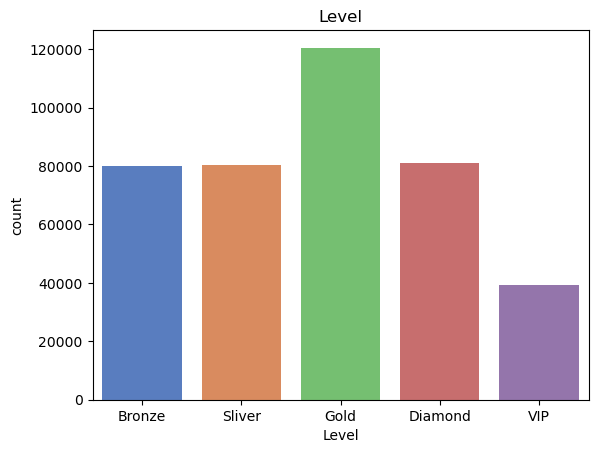

In [52]:
sns.countplot(x='Level', data=co_rfm_df, palette='muted', order=order)
plt.title('Level')
plt.show()

### Ï∞®Ìä∏ ÏãúÍ∞ÅÌôî ÏûêÎ£å Î∂ÑÏÑù Í≤∞Í≥º 
Í∞Å ÌöåÏõêÏùò Îì±Í∏âÏùÑ ÏãúÍ∞ÅÌôî ÏûêÎ£åÎ°ú Î∂ÑÏÑùÌïú Í≤∞Í≥º VIP, Îã§Ïù¥ÏïÑÎ™¨ÎìúÏùò ÌöåÏõê Îì±Í∏â Í±∞Ïùò ÎèôÏùºÌïú ÏàòÏ§ÄÏùò Î∂ÑÌè¨Î•º Î≥¥Ïù¥Í≥† ÏûàÏúºÎ©∞,
Í∞ÄÏû• ÎßéÏùÄ Î∂ÑÌè¨Î•º Í∞ÄÏßÑ ÌöåÏõê Îì±Í∏âÏùÄ Ïã§Î≤Ñ Îì±Í∏âÏùò ÌöåÏõêÎì§Ïù¥Í≥†, Í∞ÄÏû• ÌïòÏúÑÏùò Î∂ÑÌè¨Î•º Í∞ÄÏßÑ ÌöåÏõê Îì±Í∏âÏùÄ Îã§Ïù¥ÏïÑÎ™¨Îìú,VIP ÌöåÏõêÎì§Ïù¥ÏòÄÏäµÎãàÎã§.
Í∑∏Îü¨ÎÇò Í∞Å Íµ≠Í∞ÄÏóê Îî∞ÎùºÏÑú Ïù¥Îü¨Ìïú Î©§Î≤Ñ Îì±Í∏âÏùÄ ÏÑúÎ°ú Îã§Î•º Ïàò ÏûàÏúºÎ©∞, Ïù¥ Ï†êÏùÑ Ïú†ÏùòÌïòÏó¨ Íµ≠Í∞ÄÎ≥ÑÎ°ú Î©§Î≤Ñ Îì±Í∏âÏùÑ Î∂ÑÏÑùÌïòÎäî Í≤ÉÏù¥ Îçî Ï§ëÏöîÌï† Í≤ÉÏûÖÎãàÎã§.

### üí° Í≤∞Î°†
Ïã§Î≤Ñ ÌöåÏõêÎì§Ïùò ÌäπÏÑ± Î∞è Íµ¨Îß§ Ìå®ÌÑ¥, Í∑∏Î¶¨Í≥† Îã§Ïù¥ÏïÑ Î∞è VIP ÌöåÏõêÎì§Ïùò ÌòúÌÉù Î∞è ÏÑúÎπÑÏä§Ïóê ÎåÄÌïú Î∂ÑÏÑùÏù¥ ÌïÑÏöîÌï† Í≤ÉÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§. ÎòêÌïú, Ïù¥Îü¨Ìïú Î∂ÑÏÑùÏùÑ ÌÜ†ÎåÄÎ°ú VIP ÌöåÏõêÎì§Ïùò ÏàòÎ•º ÎäòÎ¶¨Í≥†, Ïã§ Îì±Í∏â ÌöåÏõêÎì§ÏùÑ Ïú†ÏßÄÌïòÎ©∞ Ïã†Í∑ú Í≥†Í∞ùÏùÑ Ïú†ÏπòÌïòÎäî Ï†ÑÎûµÏùÑ ÏàòÎ¶ΩÌï† ÌïÑÏöîÍ∞Ä ÏûàÏùÑ Í≤ÉÏûÖÎãàÎã§.





In [54]:
co_rfm_df['country'].value_counts()
# ÏòÅÍµ≠Ïùò Îç∞Ïù¥ÌÑ∞ ÏàòÍ∞Ä ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎßéÏùÄ Í≤ÉÏúºÎ°ú ÎØ∏Î£®Ïñ¥Î≥¥ÏïÑ ÏïÑÎßà ÏòÅÍµ≠ ÎÇ¥ Í∏∞ÏóÖÏù∏ Í≤ÉÏúºÎ°ú ÏòàÏÉÅ

country
United Kingdom          356501
Germany                   9477
France                    8475
EIRE                      7475
Spain                     2527
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      802
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     245
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [55]:
price = co_rfm_df.groupby('country')['TotalScore'].sum().sort_values(ascending=False)
print(price)
# Íµ≠Í∞ÄÎ≥Ñ RFM ÌÜµÍ≥Ñ Ìï©ÏÇ∞ = ÏòÅÍµ≠ ,EIRE , ÎèÖÏùº,ÌîÑÎûëÏä§,Ïä§ÌéòÏù∏,Î≤®Í∏∞Ïóê,Ïä§ÏúÑÏä§,Ìè¨Î•¥Ìà¨Í∞à,ÌïÄÎûÄÎìú,Ïù¥ÌÉàÎ¶¨ÏïÑ ...

country
United Kingdom          354078.527794
EIRE                     15325.139072
Germany                   8855.815493
France                    8122.086414
Netherlands               4966.710814
Spain                     2361.406174
Belgium                   1880.607699
Australia                 1559.595792
Switzerland               1533.380778
Portugal                  1336.458066
Norway                    1076.787758
Italy                      673.609507
Finland                    641.029327
Channel Islands            633.032944
Cyprus                     524.505072
Sweden                     451.428285
Denmark                    350.606538
Austria                    326.688629
Japan                      306.779140
Poland                     291.920907
USA                        246.421134
Singapore                  211.256222
Iceland                    187.661997
Israel                     177.704594
Unspecified                155.331604
Malta                      109.474438
Cana

In [56]:
price =co_rfm_df.groupby('country')['price'].sum().sort_values(ascending=False)
print(price)
#  ÎÇòÎùºÎ≥Ñ Í≤∞Ï†ú Ìï©ÏÇ∞

country
United Kingdom          1155894.124
France                    42825.230
EIRE                      38209.260
Germany                   37628.040
Singapore                 25108.890
Portugal                  12903.250
Spain                     11495.500
Belgium                    7540.130
Switzerland                6568.600
Norway                     6529.060
Netherlands                6492.550
Australia                  4048.000
Cyprus                     3880.040
Italy                      3874.890
Finland                    3786.850
Channel Islands            3736.900
Sweden                     1804.730
Austria                    1701.520
Poland                     1422.270
Denmark                    1266.950
Canada                      910.580
Israel                      898.590
Japan                       814.860
Unspecified                 775.950
Greece                      713.290
Malta                       666.010
USA                         644.980
Iceland             

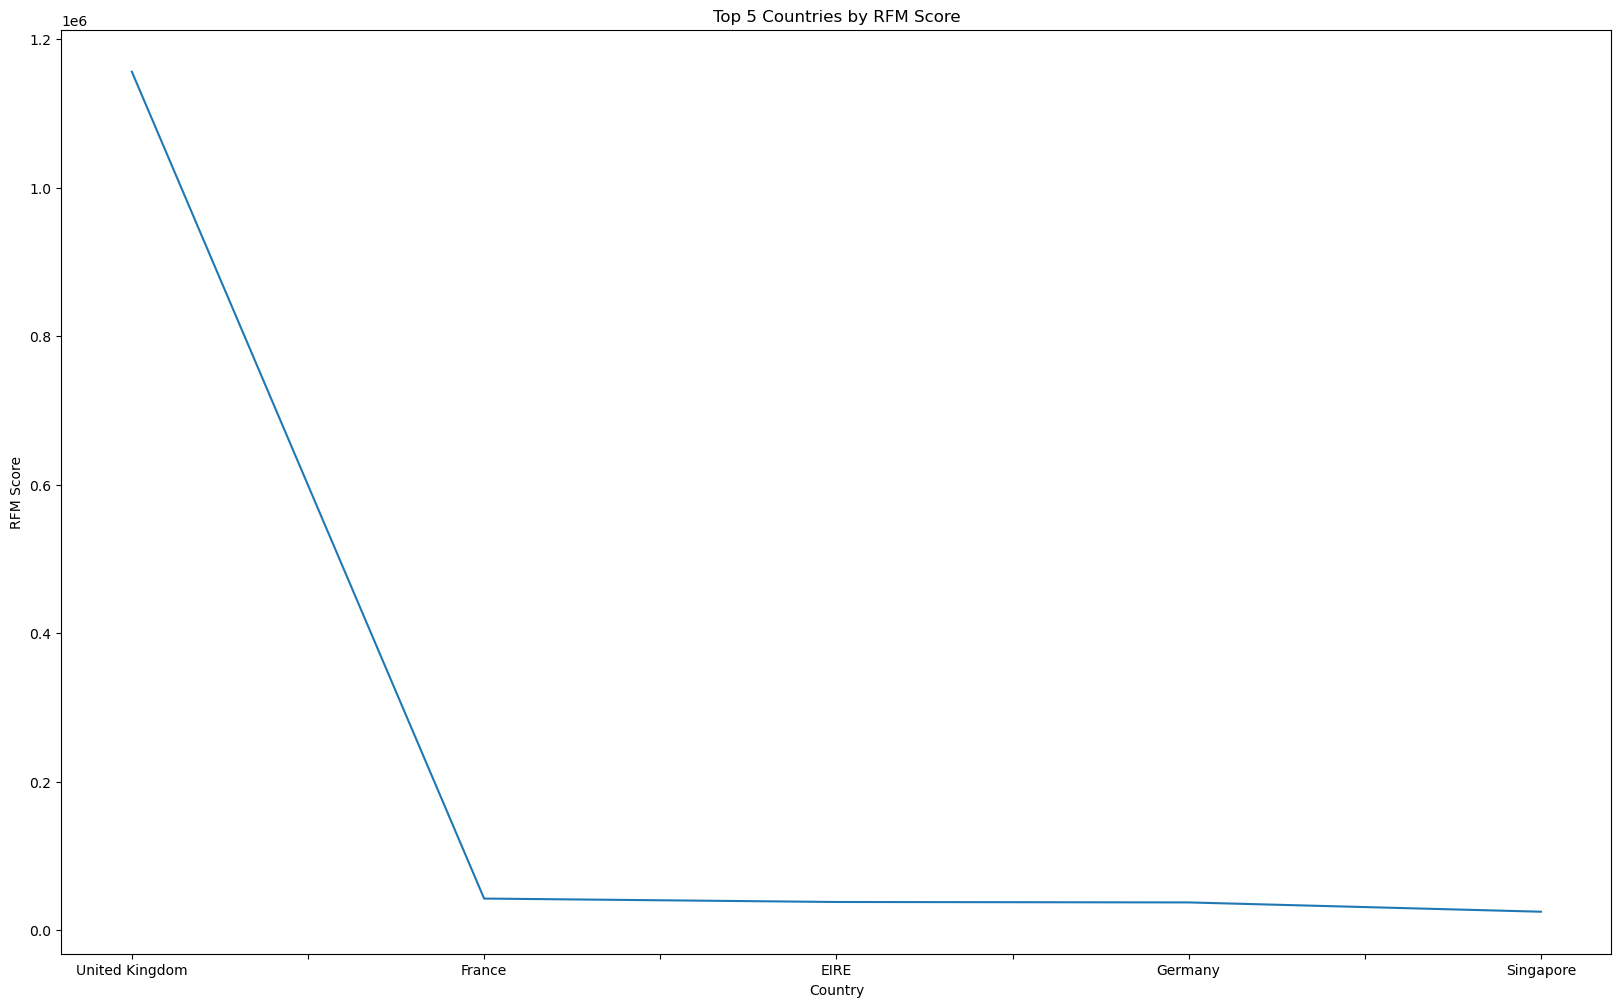

In [57]:
fig, axes = plt.subplots(1, figsize=(20, 12))

# Í∞Å ÎÇòÎùºÎ≥ÑÎ°ú RFM Ï†êÏàòÎ•º Ìï©ÏÇ∞ (ÏÉÅÏúÑ 5Í∞ú Íµ≠Í∞Ä Ï∂îÏ∂ú)
price_by_country = co_rfm_df.groupby('country')['price'].sum().nlargest(5)
# nlargest() = Ïó¥ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í∞ÄÏû• ÌÅ∞ Í∞íÏùÑ Í∞ÄÏßÄÎäî ÏöîÏÜåÎì§ÏùÑ ÏÑ†ÌÉùÌïòÎäî Î©îÏÑúÎìúÏù¥Î©∞, Í∞ÄÏû• ÌÅ∞ Í∞íÏùÑ Í∞ÄÏßÄÎäî 
#ÏÉÅÏúÑ NÍ∞úÏùò ÏöîÏÜåÎ•º ÏÑ†ÌÉùÌï† Îïå ÏÇ¨Ïö©Ìï®

# ÏãúÍ∞ÅÌôî
price_by_country.plot(kind='line', ax=axes)
axes.set_title('Top 5 Countries by RFM Score')
axes.set_xlabel('Country')
axes.set_ylabel('RFM Score')
plt.show()


Ï¥ù Í≤∞Ï†úÍ∏àÏï° Ìï©ÏÇ∞ Ïó≠Ïãú ÏòÅÍµ≠Ïù¥ ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎßéÏùÄ Í≤ÉÏùÑ ÌôïÏù∏ Ìï† Ïàò ÏûàÏúºÎ©∞, Í∑∏ Îã§ÏùåÏúºÎ°ú ÌîÑÎûëÏä§, ÏïÑÏùºÎûúÎìú, ÎèÖÏùº, Ïã±Í∞ÄÌè¨Î•¥, ÏàúÏúºÎ°ú ÎßéÏùÄ Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.

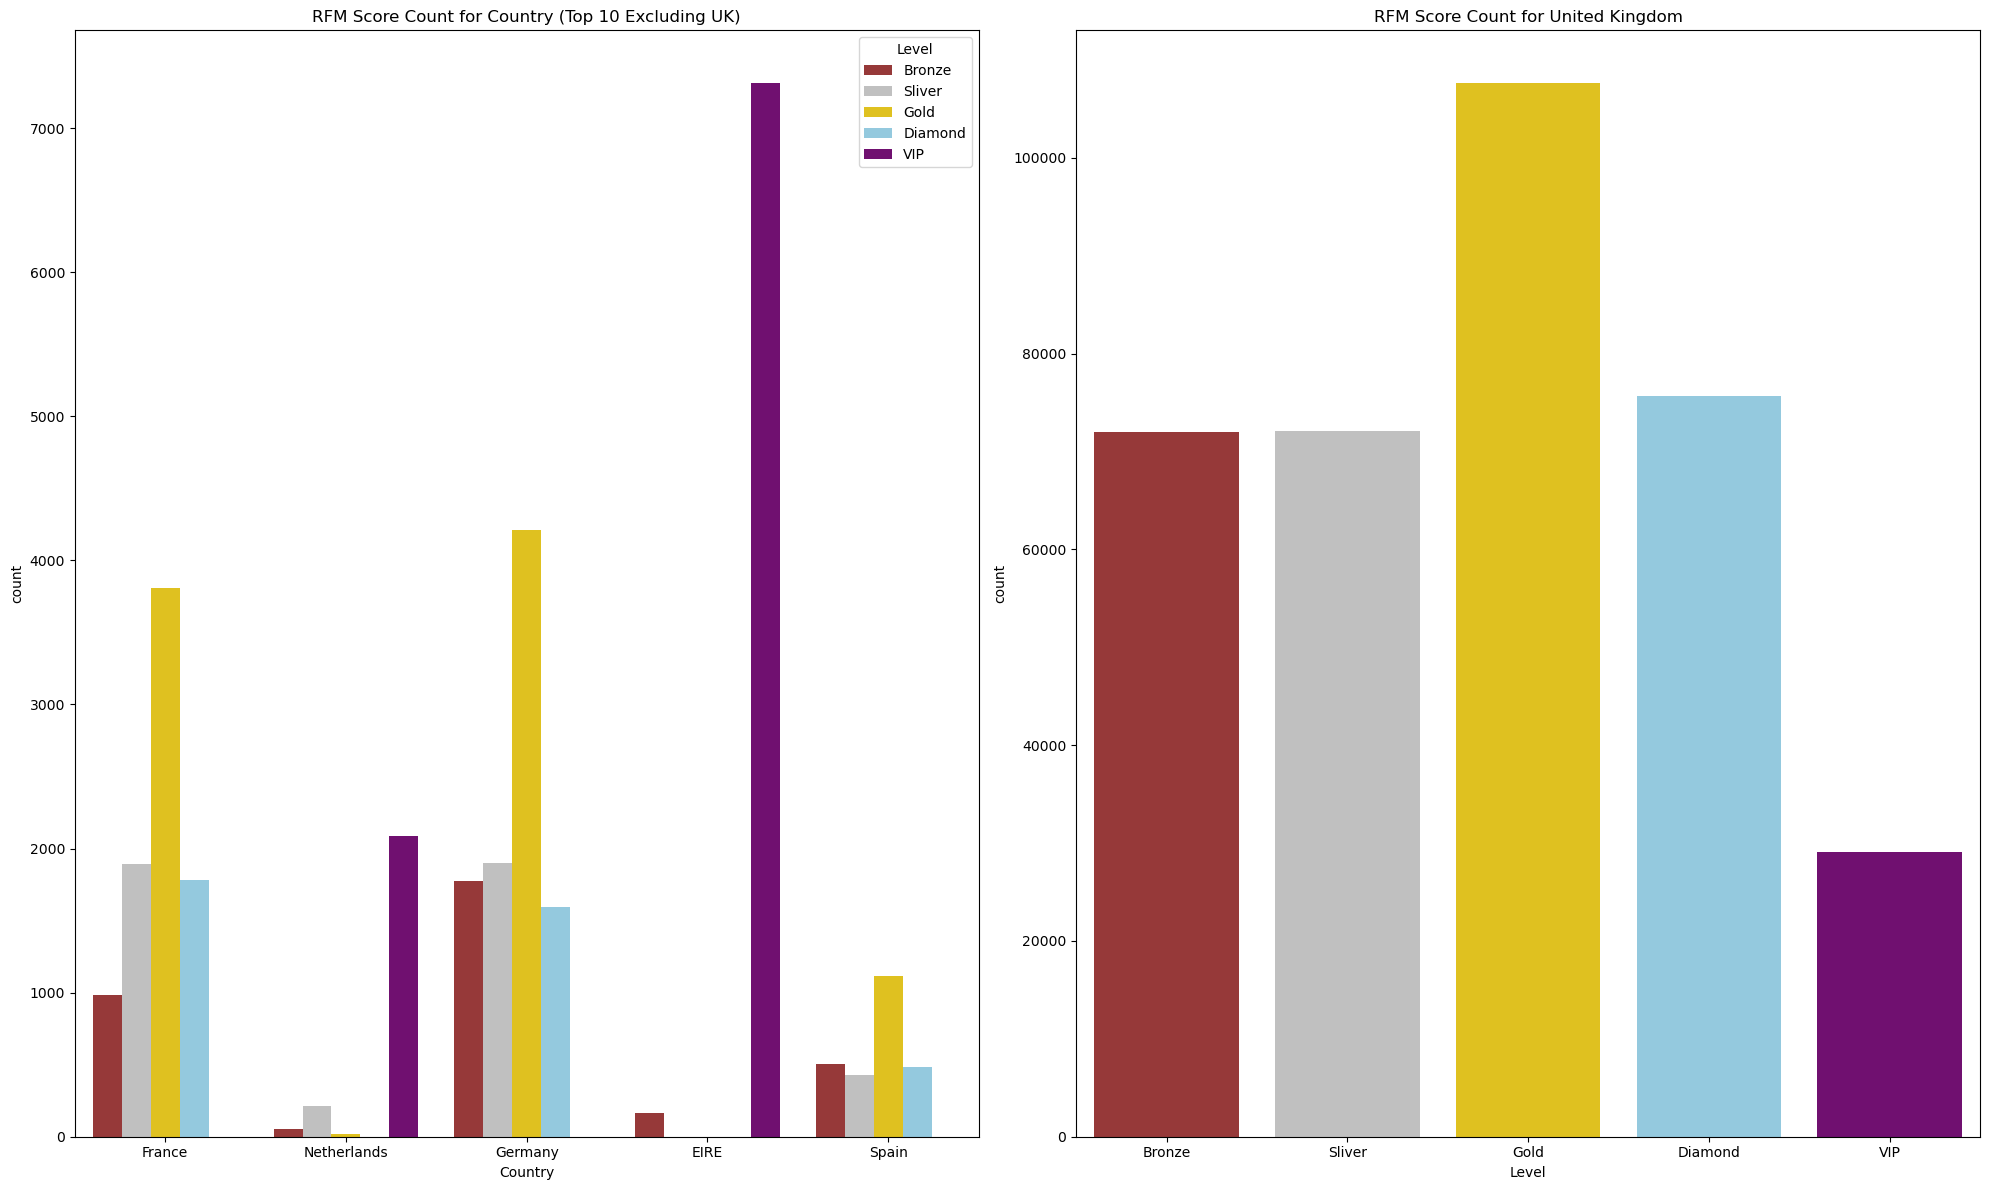

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = {'Bronze': 'brown', 'Sliver': 'silver', 'Gold': 'gold', 'Diamond': 'skyblue', 'VIP': 'purple'}
order_columns = ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP']

# ÏòÅÍµ≠ÏùÑ Ï†úÏô∏Ìïú ÏÉÅÏúÑ 10Í∞ú Íµ≠Í∞Ä ÏÑ†ÌÉù (ÏòÅÍµ≠ Íµ≠Ï†ÅÏùÑ Í∞ÄÏßÑ ÌöåÏõêÎì§Ïùò ÏàòÍ∞Ä Îß§Ïö∞ ÎßéÍ∏∞ ÎïåÎ¨∏Ïóê)
# top_countries = real_df[real_df['country'] != 'United Kingdom']['country'].value_counts().nlargest(10).index
# nlargest() = Ïó¥ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í∞ÄÏû• ÌÅ∞ Í∞íÏùÑ Í∞ÄÏßÄÎäî ÏöîÏÜåÎì§ÏùÑ ÏÑ†ÌÉùÌïòÎäî Î©îÏÑúÎìúÏù¥Î©∞, Í∞ÄÏû• ÌÅ∞ Í∞íÏùÑ Í∞ÄÏßÄÎäî 
#ÏÉÅÏúÑ NÍ∞úÏùò ÏöîÏÜåÎ•º ÏÑ†ÌÉùÌï† Îïå ÏÇ¨Ïö©Ìï®

# ÏòÅÍµ≠ÏùÑ Ï†úÏô∏Ìïú ÏÉÅÏúÑ 10Í∞ú Íµ≠Í∞Ä ÏÑ†ÌÉù (ÏòÅÍµ≠ Íµ≠Ï†ÅÏùÑ Í∞ÄÏßÑ ÌöåÏõêÎì§Ïùò ÏàòÍ∞Ä Îß§Ïö∞ ÎßéÍ∏∞ ÎïåÎ¨∏Ïóê)
# Ïù∏Îç±Ïä§ Ïä¨ÎùºÏù¥Ïã±ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏòÅÍµ≠ÏùÑ Ï†úÏô∏Ìïú ÏÉÅÏúÑ 5Í∞ú Íµ≠Í∞Ä Ï∂îÏ∂ú 
top_countries = co_rfm_df[co_rfm_df['country'] != 'United Kingdom']['country'].value_counts().index[:5]

# ÏÉÅÏúÑ 10Í∞ú Íµ≠Í∞ÄÏóê Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
filtered_df = co_rfm_df[co_rfm_df['country'].isin(top_countries)]

# Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# ÏôºÏ™Ω Í∑∏ÎûòÌîÑ: ÏòÅÍµ≠ÏùÑ Ï†úÏô∏Ìïú ÏÉÅÏúÑ 10Í∞ú Íµ≠Í∞ÄÏóê ÎåÄÌïú Îì±Í∏âÎ≥Ñ RFM Ìï©ÏÇ∞ Ï∞®Ìä∏ ÏãúÍ∞ÅÌôî
sns.countplot(ax=axes[0], x='country', hue='Level', data=filtered_df, palette=colors, hue_order=order_columns)
axes[0].set_title('RFM Score Count for Country (Top 10 Excluding UK)')
axes[0].set_xlabel('Country')

# Ïò§Î•∏Ï™Ω Í∑∏ÎûòÌîÑ: ÏòÅÍµ≠(United Kingdom)Ïóê ÎåÄÌïú Îì±Í∏âÎ≥Ñ RFM Ìï©ÏÇ∞ Ï∞®Ìä∏ ÏãúÍ∞ÅÌôî 
uk_df = co_rfm_df[co_rfm_df['country'] == 'United Kingdom']
sns.countplot(ax=axes[1], x='Level', order=order_columns, data=uk_df, palette=colors)
axes[1].set_title('RFM Score Count for United Kingdom')
axes[1].set_xlabel('Level')

plt.tight_layout()
plt.show()

### üåè Ìï¥Ïô∏ ÎßàÏºÄÌåÖ Ï†ÑÎûµ
> (ÏòÅÍµ≠ ÎÇ¥ Í∏∞ÏóÖÏù∏ Í≤ÉÏúºÎ°ú ÌåêÎã®ÌïòÏó¨, ÏòÅÍµ≠ÏùÑ Ï†úÏô∏Ìïú ÏÉÅÏúÑ 10Í∞ú Íµ≠Í∞ÄÏóê ÎåÄÌïú ÎßàÏºÄÌåÖ Ï†ÑÎûµ Î∂ÑÏÑù)

#### <img src="./images/germany.png" width="30px"> ÎèÖÏùº ÎßàÏºÄÌåÖ Ï†ÑÎûµ
- ÎèÖÏùºÏóêÏÑúÎäî Í≥®Îìú Îì±Í∏â ÌöåÏõêÎì§Ïù¥ Í∞ÄÏû• ÎßéÏùÄ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨ÏúºÎØÄÎ°ú, ÎèÖÏùº ÏãúÏû•ÏóêÏÑúÎäî Í≥®Îìú Îì±Í∏â ÌöåÏõêÎì§ÏùÑ Ï£ºÏöî ÌÉÄÍ≤üÏúºÎ°ú ÏÇºÏùÑ Ïàò ÏûàÏäµÎãàÎã§.
- Í≥®Îìú Îì±Í∏â ÌöåÏõêÎì§ÏùÄ ÎÜíÏùÄ Íµ¨Îß§Ïú®Í≥º Ï∂©ÏÑ±ÎèÑÎ•º Î≥¥Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê, ÌäπÎ≥ÑÌïú ÌòúÌÉùÏù¥ÎÇò ÌîÑÎ¶¨ÎØ∏ÏóÑ ÏÑúÎπÑÏä§Î•º Ï†úÍ≥µÌïòÏó¨ Ïù¥ÌÉàÏùÑ Î∞©ÏßÄÌïòÍ≥† Î∏åÎûúÎìú Ï∂©ÏÑ±ÎèÑÎ•º ÎÜíÏùº Ïàò ÏûàÏäµÎãàÎã§.
- Ïã§Î≤Ñ Îì±Í∏â ÌöåÏõêÎèÑ ÏÉÅÎãπÌïú ÏàòÎ•º Ï∞®ÏßÄÌïòÍ≥† ÏûàÏúºÎØÄÎ°ú, Ïù¥Îì§ÏóêÍ≤åÎèÑ Ï£ºÏùòÎ•º Í∏∞Ïö∏Ïùº ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§.
- Ïã§Î≤Ñ Îì±Í∏â ÌöåÏõêÎì§ÏóêÍ≤åÎäî Ï∂îÍ∞Ä ÌòúÌÉùÏùÑ Ï†úÍ≥µÌïòÏó¨ Ï∂©ÏÑ±ÎèÑÎ•º ÎÜíÏù¥Í≥†, ÏÉÅÏúÑ Îì±Í∏âÏúºÎ°úÏùò Îì±Í∏â ÏóÖÍ∑∏Î†àÏù¥ÎìúÎ•º Ïú†ÎèÑÌïòÏó¨ ÏàòÏùµÏùÑ Ï∞ΩÏ∂ú Ìï† Ïàò ÏûàÏäµÎãàÎã§.
- Îã§Ïù¥ÏïÑÎ™¨Îìú Îì±Í∏âÏùò ÌöåÏõêÎèÑ Î∏åÎ°†Ï¶à,VIP ÌöåÏõê Î≥¥Îã§ ÎßéÏùÄ ÏàòÏπòÎ•º Í∏∞Î°ùÌïòÏòÄÏúºÎØÄÎ°ú Îã§Ïù¥ÏïÑÎ™¨Îìú Îì±Í∏â ÌöåÏõêÎì§ÏóêÍ≤åÎäî ÌäπÎ≥Ñ ÌîÑÎ°úÎ™®ÏÖòÏùÑ Ï†úÍ≥µÌïòÏó¨, ÏàòÏùµÏÑ±ÏùÑ Ï∞ΩÏ∂úÌï† Ïàò ÏûàÏäµÎãàÎã§.
- Î∏åÎ°†Ï¶à Î∞è VIP Îì±Í∏â ÌöåÏõêÏùò ÏàòÍ∞Ä ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ï†ÅÏùÄ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨ÏúºÎØÄÎ°ú, Ïù¥Îì§ÏùÑ ÎäòÎ¶¨Îäî Îç∞Ïóê Ï§ëÏ†êÏùÑ ÎëêÏñ¥Ïïº Ìï©ÎãàÎã§.
- Î∏åÎ°†Ï¶à Î∞è VIP Îì±Í∏â ÌöåÏõêÎì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Ìïú ÌäπÎ≥ÑÌïú ÌòúÌÉùÏù¥ÎÇò ÌîÑÎ°úÎ™®ÏÖòÏùÑ Ï†úÍ≥µÌïòÏó¨ Îì±Í∏â ÏóÖÍ∑∏Î†àÏù¥ÎìúÎ•º Ïú†ÎèÑÌï† Ïàò ÏûàÏäµÎãàÎã§.

#### <img src="./images/france.png" width="30px"> ÌîÑÎûëÏä§ ÎßàÏºÄÌåÖ Ï†ÑÎûµ
- Í∞ÄÏû• ÎßéÏùÄ ÌöåÏõêÏù¥ Í≥®Îìú Îì±Í∏âÏù¥ÎØÄÎ°ú, ÌîÑÎûëÏä§ ÏãúÏû•ÏóêÏÑúÎäî Í≥®Îìú Îì±Í∏â ÌöåÏõêÎì§ÏùÑ Ï£ºÏöî ÌÉÄÍ≤üÏúºÎ°ú ÏÇºÏùÑ Ïàò ÏûàÏäµÎãàÎã§.
- Í≥®Îìú Îì±Í∏â ÌöåÏõêÎì§ÏóêÍ≤åÎäî Ìï†Ïù∏ ÌòúÌÉùÏù¥ÎÇò ÌäπÎ≥ÑÌïú ÌòúÌÉùÏùÑ Ï†úÍ≥µÌïòÏó¨ Ï∂©ÏÑ±ÎèÑÎ•º ÎÜíÏùº Ïàò ÏûàÏäµÎãàÎã§.
-  Îã§Ïù¥ÏïÑÎ™¨Îìú Îì±Í∏âÍ≥º Í∞ôÏùÄ ÏÉÅÏúÑ Îì±Í∏âÏùò ÌöåÏõêÎì§ÎèÑ ÏÉÅÎãπÏàòÎ•º Ï∞®ÏßÄÌïòÍ≥† ÏûàÏúºÎØÄÎ°ú, Ïù¥Îì§ÏóêÍ≤å Ï∂îÍ∞Ä ÌòúÌÉùÏùÑ Ï†úÍ≥µÌïòÏó¨ Ïù¥ÌÉàÏùÑ Î∞©ÏßÄÌïòÍ≥† Ï∂©ÏÑ±ÎèÑÎ•º ÎÜíÏùº Ïàò ÏûàÏäµÎãàÎã§.
- ÌäπÌûà Ïù¥Îü¨Ìïú ÏÉÅÏúÑ Îì±Í∏âÏùò Í≥†Í∞ùÏùò Í≤ΩÏö∞ Í∏∞ÏóÖÏùò ÌïµÏã¨ Í≥†Í∞ùÏù¥Í∏∞ ÎïåÎ¨∏Ïóê, ÌîÑÎ¶¨ÎØ∏ÏóÑ ÏÑúÎπÑÏä§ÎÇò Ï†úÌíàÏùÑ ÌôçÎ≥¥ÌïòÍ≥† Ïù¥ÏôÄ Í∞ôÏùÄ ÎßàÏºÄÌåÖÏùÑ ÌîÑÎûëÏä§ ÎÇ¥Ïùò Í≥®Îìú Î∞è Îã§Ïù¥ÏïÑÎ™¨Îìú ÌöåÏõêÎì§ÏùÑ ÏúÑÌï¥ ÎßàÏºÄÌåÖ Ï†ÑÎûµÏùÑ ÌôïÏû•ÌïòÏó¨Ïïº Ìï©ÎãàÎã§.
- Î∏åÎ°†Ï¶à Î∞è VIP Îì±Í∏â ÌöåÏõêÏùò ÏàòÍ∞Ä ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ï†ÅÏùÄ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨ÏúºÎØÄÎ°ú, Ïù¥Îì§ÏùÑ ÎäòÎ¶¨Îäî Îç∞Ïóê Ï¥àÏ†êÏùÑ ÎßûÏ∂ú ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§.
- Î∏åÎ°†Ï¶à Îì±Í∏â ÌöåÏõêÎì§ÏóêÍ≤åÎäî ÌäπÎ≥ÑÌïú Ìï†Ïù∏ ÌòúÌÉùÏùÑ Ï†úÍ≥µÌïòÏó¨ Îì±Í∏â ÏóÖÍ∑∏Î†àÏù¥ÎìúÎ•º Ïú†ÎèÑÌï† Ïàò ÏûàÏäµÎãàÎã§.
- VIP Îì±Í∏â ÌöåÏõêÎì§ÏóêÍ≤åÎäî ÌäπÎ≥Ñ ÌîÑÎ°úÎ™®ÏÖòÏùÑ Ï†úÍ≥µÌïòÏó¨ Ïù¥ÌÉàÏùÑ Î∞©ÏßÄÌïòÍ≥† Ïù¥Ï†ÑÎ≥¥Îã§ ÎÜíÏùÄ ÏàòÏùµÏùÑ Ï∞ΩÏ∂ú Ìï† Ïàò ÏûàÏäµÎãàÎã§.
  

#### ÏúÑÏùò Ï†ÑÎûµÎì§ÏùÑ Ï†ÅÏö©ÌïòÏó¨ ÏÉÅÏúÑ 2Í∞úÏùò Íµ≠Í∞Ä ÏãúÏû•ÏóêÏÑú Î∏åÎûúÎìúÏùò Ïù∏ÏßÄÎèÑÎ•º ÎÜíÏù¥Í≥† Í≥†Í∞ùÎì§Ïùò Ï∂©ÏÑ±ÎèÑÎ•º ÎÜíÏùº Ïàò ÏûàÏùÑ Í≤ÉÏûÖÎãàÎã§.
- ÎèÖÏùº ÌîÑÎûëÏä§ Îã§ÏùåÏúºÎ°ú RFM Ìï©ÏÇ∞ Ï†êÏàòÍ∞Ä ÎÜíÏïòÎçò Íµ≠Í∞ÄÎ°úÎäî Ïä§ÌéòÏù∏, Ïä§ÏúÑÏä§, Î≤®Í∏∞Ïóê ÏàúÏù¥ÏòÄÏäµÎãàÎã§. 
- Ïù¥ 3Í∞úÏùò Íµ≠Í∞ÄÎì§Ïùò Í≤ΩÏö∞ Í∞Å Î©§Î≤ÑÎ≥Ñ Îì±Í∏âÏù¥ Í∞ÅÍ∏∞ Îã¨ÎûêÏúºÎ©∞, Ïù¥Î•º ÌÜµÍ≥ÑÎ°ú ÎÇòÎ®∏ÏßÄ Íµ≠Í∞ÄÎì§Ïóê ÎåÄÌï¥ÏÑú Î∂ÑÏÑùÏùÑ ÌïòÏòÄÏäµÎãàÎã§.

#### <img src="./images/iland.png" width="30px"> ÏïÑÏùºÎûúÎìú ÎßàÏºÄÌåÖ Ï†ÑÎûµ
- ÏïÑÏùºÎûúÎìú Í∞ôÏùÄ Í≤ΩÏö∞ VIP ÌöåÏõêÏù¥ ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎßéÏïòÏúºÎ©∞, Ïù¥Ïóê ÎßûÏ∂∞ÏÑú ÏïÑÏùºÎûúÎìúÏùò VIP ÌöåÏõêÎì§ÏóêÍ≤å ÌäπÎ≥Ñ Ïù¥Î≤§Ìä∏ Î∞è VIP ÌîÑÎ°úÎ™®ÏÖò Ïù¥Î≤§Ìä∏Î•º ÏßÑÌñâÌïòÏó¨ ÎÜíÏùÄ ÏàòÏùµÏùÑ Ï∞ΩÏ∂ú Ìï† Ïàò ÏûàÏäµÎãàÎã§.

#### <img src="./images/swice.png" width="30px"> Ïä§ÏúÑÏä§ ÎßàÏºÄÌåÖ Ï†ÑÎûµ
- Ïä§ÏúÑÏä§Îäî Í≥®Îìú Îì±Í∏âÏùò ÌöåÏõêÎì§Ïù¥ Í∞ÄÏû• ÎßéÏù¥ Î∂ÑÌè¨ÎêòÏñ¥ÏûàÏóàÍ≥†,, Ïù¥Îü¨Ìïú Í≥®Îìú Îì±Í∏â ÌöåÏõêÎì§ÏóêÍ≤åÎäî Ï∂îÍ∞Ä ÌòúÌÉù Î∞è ÌîÑÎ°úÎ™®ÏÖòÏùÑ Ï†úÍ≥µÌïòÏó¨ ÏÉÅÏúÑ Îì±Í∏âÏúºÎ°úÏùò ÏóÖÍ∑∏Î†àÏù¥ÎìúÎ•º Ïú†ÎèÑÌïòÍ≥† Ïù¥ÌÉàÏùÑ Î∞©ÏßÄÌïòÏó¨Ïïº ÌïòÎäî ÎßàÏºÄÌåÖ Ï†ÑÎûµÏùÑ ÏÑ∏ÏõåÏïºÌï©ÎãàÎã§.
- 
#### <img src="./images/bel.png" width="30px"> Î≤®Í∏∞Ïóê ÎßàÏºÄÌåÖ Ï†ÑÎûµ
- Í∑∏ Îã§Ïùå Î≤®Í∏∞ÏóêÏùò Í≤ΩÏö∞ Í≥®Îìú Îì±Í∏âÏùò ÌöåÏõêÎì§Ïù¥ Í∞ÄÏû• ÎßéÏïòÏúºÎ©∞ Í≥®Îìú Îì±Í∏âÏùò ÌöåÏõêÎì§ÏóêÍ≤åÎäî Ï∂îÍ∞Ä ÌòúÌÉù Î∞è ÌîÑÎ°úÎ™®ÏÖòÏùÑ Ï†úÍ≥µÌïòÏó¨ Îã§Ïù¥ÏïÑÎ™¨Îìú Îì±Í∏âÏúºÎ°úÏùò ÏóÖÍ∑∏Î†àÏù¥ÎìúÎ•º Ïú†ÎèÑÌïòÍ≥† Ïù¥ÌÉàÏùÑ Î∞©ÏßÄÌïòÏó¨Ïïº ÌïòÎäî ÎßàÏºÄÌåÖ Ï†ÑÎûµÏùÑ ÏÑ∏ÏõåÏïºÌï©ÎãàÎã§. 


### Í≤∞Î°† 
ÏÉÅÏúÑ 10Í∞ú Íµ≠Í∞Ä Ï§ë Í∞ÄÏû• ÎÜíÏùÄ RFM Ï†êÏàòÎ•º Í∏∞Î°ùÌïú ÎèÖÏùºÍ≥º ÌîÑÎûëÏä§Ïóê ÏßëÏ§ëÏ†ÅÏù∏ ÎßàÏºÄÌåÖ Ï†ÑÎûµÏùÑ ÌéºÏ≥êÏïº ÌïòÎ©∞, ÎÇòÎ®∏ÏßÄ Íµ≠Í∞Ä Îì§Ïóê ÎåÄÌï¥ÏÑúÎèÑ ÏïûÏÑú Î∂ÑÏÑùÌïú Í∞úÎ≥Ñ Íµ≠Í∞ÄÏóê ÎåÄÌïú ÎßàÏºÄÌåÖ Ï†ÑÎûµÏùÑ Ï∞∏Í≥†ÌïòÏó¨ Í∞Å Íµ≠Í∞ÄÏùò ÌäπÏÑ±Í≥º ÌöåÏõê Îì±Í∏â Î∂ÑÌè¨Ïóê ÎßûÏ∂∞ ÎßûÏ∂§Ìòï ÎßàÏºÄÌåÖ Ï†ÑÎûµÏùÑ ÎèÑÏûÖÌïòÏó¨Ïïº Ìï©ÎãàÎã§.

### <img src="./images/uk.png" width="30px"> ÏòÅÍµ≠ ÎÇ¥ ÎßàÏºÄÌåÖ Ï†ÑÎûµ 
> RFM Î∂ÑÏÑù Í≤∞Í≥º Í∞ÄÏû• ÎßéÏùÄ ÎπÑÏ§ëÏùÑ Ï∞®ÏßÄÌïú ÏòÅÍµ≠Ïùò Í≤ΩÏö∞ Í≥®Îìú Îì±Í∏âÏùò ÌöåÏõêÎì§Ïù¥ Í∞ÄÏû• ÎßéÏùÄ Í≤ÉÏùÑ ÌôïÏù∏ Ìï† Ïàò ÏûàÏúºÎ©∞,

> Í∑∏ Îã§ÏùåÏúºÎ°ú Î∏åÎ°†Ï¶à, Îã§Ïù¥ÏïÑÎ™¨Îìú, Ïã§Î≤Ñ , VIP Îì±Í∏â ÏàúÏúºÎ°ú ÌöåÏõêÎì§Ïùò Îì±Í∏âÏù¥ Î∂ÑÌè¨ ÎêòÏûàÎäî Í≤ÉÏùÑ ÌôïÏù∏ Ìï† Ïàò ÏûàÏóàÏäµÎãàÎã§.

#### Í≥®Îìú Îì±Í∏â ÌöåÏõê ÌÉÄÍ≤üÌåÖ
- Í≥®Îìú Îì±Í∏â ÌöåÏõêÏù¥ Í∞ÄÏû• ÎßéÏùÄ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨ÏúºÎØÄÎ°ú, Í≥®Îìú Îì±Í∏â ÌöåÏõêÏùÑ Ï§ëÏ†êÏ†ÅÏúºÎ°ú ÌÉÄÍ≤üÏúºÎ°ú ÏÇºÏäµÎãàÎã§.
- Í≥®Îìú Îì±Í∏â ÌöåÏõêÎì§ÏùÄ Ïù¥ÎØ∏ ÎÜíÏùÄ Ï∂©ÏÑ±ÎèÑÎ•º Î≥¥Ïù¥Îäî Í≥†Í∞ùÏù¥ÎØÄÎ°ú, Ï∂îÍ∞Ä ÌòúÌÉùÏùÑ Ï†úÍ≥µÌïòÏó¨ Í∑∏Îì§Ïùò Ï∂©ÏÑ±ÎèÑÎ•º Ïú†ÏßÄÌïòÍ≥† Ïù¥ÌÉàÏùÑ Î∞©ÏßÄÌï©ÎãàÎã§.
- Í≥®Îìú Îì±Í∏â ÌöåÏõêÎì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Ìïú ÌäπÎ≥Ñ ÌîÑÎ°úÎ™®ÏÖò, Ìï†Ïù∏ ÌòúÌÉù Îì±ÏùÑ Ï†úÍ≥µÌïòÏó¨ Í∑∏Îì§Ïùò ÎßåÏ°±ÎèÑÎ•º ÎÜíÏù¥Í≥† Ï∂îÍ∞Ä Íµ¨Îß§Î•º Ïú†ÎèÑÌï©ÎãàÎã§.
#### Î∏åÎ°†Ï¶à Î∞è Îã§Ïù¥ÏïÑÎ™¨Îìú, Ïã§Î≤Ñ, VIP Îì±Í∏â ÌöåÏõê ÌÉÄÍ≤üÌåÖ
- Í≥®Îìú Îì±Í∏â Ïù¥Ïô∏Ïùò ÌöåÏõêÎì§ÏóêÍ≤åÎèÑ Ï£ºÏùòÎ•º Í∏∞Ïö∏Ïù¥Î©∞, Í∞Å Îì±Í∏âÏóê ÎßûÎäî ÌäπÎ≥ÑÌïú ÌòúÌÉùÏùÑ Ï†úÍ≥µÌï©ÎãàÎã§.
- Î∏åÎ°†Ï¶à Îì±Í∏â ÌöåÏõêÏóêÍ≤åÎäî Îì±Í∏â ÏóÖÍ∑∏Î†àÏù¥ÎìúÎ•º Ïú†ÎèÑÌïòÎäî ÌòúÌÉùÏùÑ Ï†úÍ≥µÌïòÏó¨ Ï∂©ÏÑ±ÎèÑÎ•º ÎÜíÏûÖÎãàÎã§.
- VIP Îì±Í∏â ÌöåÏõêÎì§ÏóêÍ≤åÎäî VIP ÏÑúÎπÑÏä§, Ïù¥Î≤§Ìä∏ Ï¥àÎåÄ Îì± Í≥†Í∏â ÏÑúÎπÑÏä§Î•º Ï†úÍ≥µÌïòÏó¨ ÏàòÏùµÏÑ±ÏùÑ Ìñ•ÏÉÅÏãúÌÇµÎãàÎã§.
- Îã§Ïù¥ÏïÑÎ™¨Îìú Îì±Í∏â ÌöåÏõêÎì§ÏóêÍ≤åÎäî VIP Îì±Í∏âÏúºÎ°úÏùò ÏóÖÍ∑∏Î†àÏù¥ÎìúÎ•º Ïú†ÎèÑÌïòÏó¨ ÌäπÎ≥Ñ ÌîÑÎ°úÎ™®ÏÖòÏùÑ Ï†úÍ≥µÌïòÍ±∞ÎÇò Ìï†Ïù∏ ÌòúÌÉùÏùÑ Ï†úÍ≥µÌï©ÎãàÎã§.
- Î∏åÎ°†Ï¶à Îì±Í∏â ÌöåÏõêÎì§ÏóêÍ≤åÎäî ÌäπÎ≥ÑÌïú Ìï†Ïù∏ ÌòúÌÉùÏùÑ Ï†úÍ≥µÌïòÏó¨ Ïù¥ÌÉàÏùÑ Î∞©ÏßÄÌïòÍ≥†, Ïù¥Îì§ÏùÑ ÎäòÎ¶¨Îäî Îç∞Ïóê Ï§ëÏ†êÏùÑ ÎëêÏñ¥Ïïº Ìï©ÎãàÎã§.
#### Í≤∞Î°† 
Í∞Å Îì±Í∏âÏùò ÌöåÏõêÎì§ÏóêÍ≤å ÏúÑÏôÄ Í∞ôÏùÄ ÎßûÏ∂§Ìòï ÎßàÏºÄÌåÖ Ï∫†ÌéòÏù∏ÏùÑ Ïã§ÌñâÌïòÍ≥†, Ïù¥Îü¨Ìïú Ï†ÑÎûµÏùÑ ÌÜµÌï¥ ÏòÅÍµ≠ ÎÇ¥ Í≥†Í∞ùÎì§Ïùò Ï∂©ÏÑ±ÎèÑÎ•º ÎÜíÏù¥Í≥† Îß§Ï∂úÏùÑ Ï¶ùÍ∞ÄÏãúÌÇ¨ Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
# real_df.groupby('Level')['code'].value_counts()
# real_df['code'].value_counts()

# real_df.groupby('code')['country'].value_counts()

In [ ]:
real_df['code'].value_counts().index[:10]

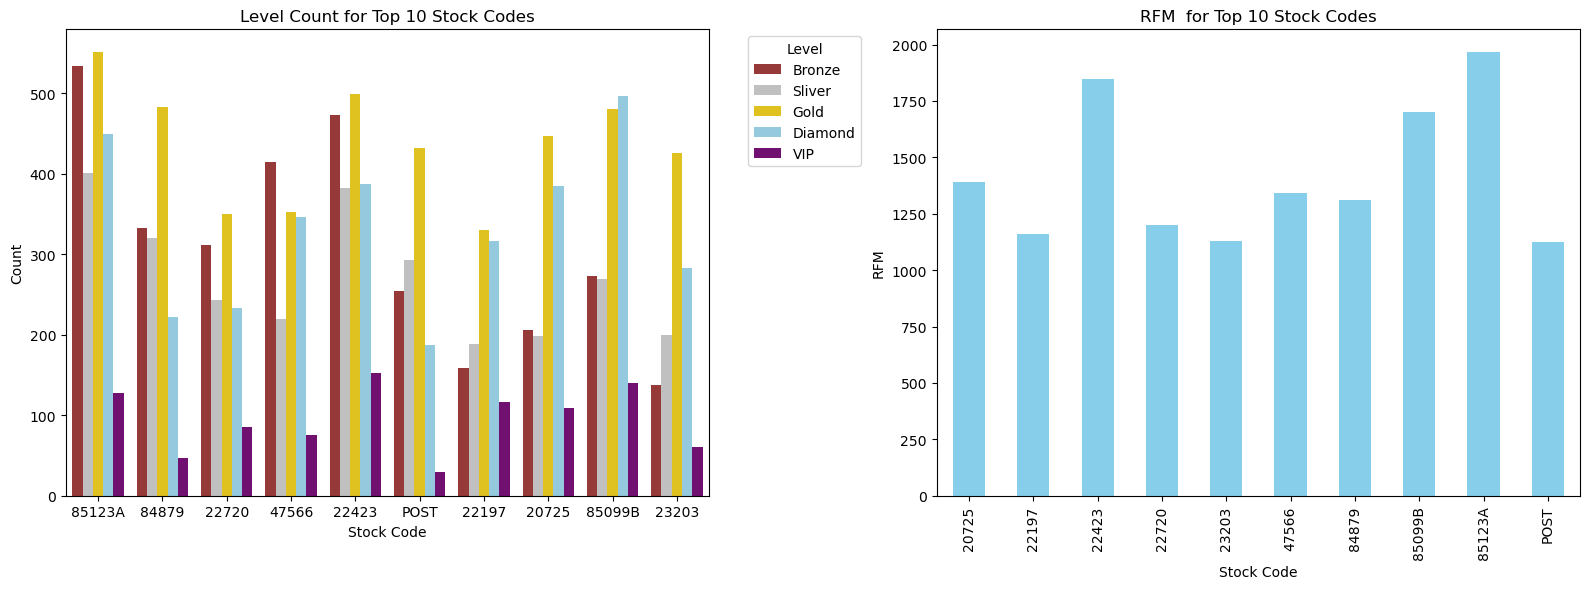

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÏÉÅÏúÑ 10Í∞ú ÏÉÅÌíà ÏΩîÎìú Ï∂îÏ∂ú
top_codes = co_rfm_df['code'].value_counts().index[:10]
filtered_df = co_rfm_df[co_rfm_df['code'].isin(top_codes)]


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = {'Bronze': 'brown', 'Silver': 'silver', 'Gold': 'gold', 'Diamond': 'skyblue', 'VIP': 'purple'}
colors = {'Bronze': 'brown', 'Sliver': 'silver', 'Gold': 'gold', 'Diamond': 'skyblue', 'VIP': 'purple'}
order_columns = ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP']

sns.countplot(ax=axes[0], x='code', hue='Level', data=filtered_df, palette=colors, hue_order=order_columns)
axes[0].set_title('Level Count for Top 10 Stock Codes')
axes[0].set_xlabel('Stock Code')
axes[0].set_ylabel('Count')
axes[0].legend(title='Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Stock CodeÏùò RFM Ìï©ÏÇ∞ Í≤∞Í≥º Ï∞®Ìä∏
price_sum = filtered_df.groupby('code')['TotalScore'].sum()
price_sum.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('RFM  for Top 10 Stock Codes')
axes[1].set_xlabel('Stock Code')
axes[1].set_ylabel('RFM')

plt.tight_layout()
plt.show()


### ÏÉÅÌíàÎ≥Ñ ÎßàÏºÄÌåÖ Ï†ÑÎûµ
- 21034 ÏΩîÎìúÎ•º Í∞ÄÏßÄÎäî  ÏÉÅÌíàÏùò Í≤ΩÏö∞ Ïã§Î≤Ñ Îì±Í∏âÍ≥º Í≥®Îìú Îì±Í∏â ÌöåÏõêÎì§Ïùò Î∂ÑÌè¨ÏàòÍ∞Ä ÎÜíÏùÄ Í≤ÉÏùÑ Î≥¥ÏïÑ Í∞ÄÏû• Ïù∏Í∏∞ ÏÉÅÌíàÏù∏ Í≤ÉÏúºÎ°ú Ï∂îÏ∏° Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïò§Î•∏Ï™Ω Í∑∏ÎûòÌîÑ Ïó≠Ïãú 21034 ÏÉÅÌíàÏùò RFM Ï†êÏàòÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏäµÎãàÎã§.
- Í∑∏Î¶¨Í≥† 20725 ÏΩîÎìúÎ•º Í∞ÄÏßÄÎäî Ï†úÌíà ÎòêÌïú Ïã§Î≤Ñ Îì±Í∏âÏùò ÌöåÏõêÎì§Ïùò Î∂ÑÌè¨ÏàòÍ∞Ä ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎßéÏùÄ Í≤ÉÏùÑ ÌôïÏù∏ Ìï† Ïàò ÏûàÏúºÎ©∞, Ïù¥Î•º ÎØ∏Î£®Ïñ¥Î≥¥ÏïòÏùÑÎïå ÎåÄÏ§ëÏ†ÅÏù∏ ÏÉÅÌíàÏù∏Í≤ÉÏúºÎ°ú ÌôïÏù∏ Ìï† Ïàò ÏûàÏäµÎãàÎã§. ÏúÑ Îëê Ìï¥Îãπ ÏÉÅÌíàÏùò Ïù∏Í∏∞Î•º Î∞îÌÉïÏúºÎ°ú Í¥ÄÎ†® ÏÉÅÌíà ÎòêÎäî Î∂ÄÍ∞Ä ÏÉÅÌíàÏùÑ Ìï®Íªò ÎßàÏºÄÌåÖÌïòÏó¨ ÏÉÅÌò∏ Î≥¥ÏôÑÏ†ÅÏù∏ ÏÉÅÌíà ÌåêÎß§Î•º Ïú†ÎèÑÌï† Ïàò ÏûàÏäµÎãàÎã§.
  
- Í∑∏Î¶¨Í≥† 85099B, 22197, 22086 ÏÉÅÌíàÎì§ÏùÄ VIP Îì±Í∏â Î∞è Îã§Ïù¥ÏïÑÎ™¨Îìú Îì±Í∏âÏùò Î∂ÑÌè¨ÏàòÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏäµÎãàÎã§.
  Ïù¥Î•º Î≥¥ÏïòÏùÑÎïå, Ïù¥Îü¨Ìïú ÏÉÅÌíàÎì§ÏùÄ Î∏åÎûúÎìú Ïù¥ÎØ∏ÏßÄÎÇò ÌíàÏßà Îì±Ïóê ÎåÄÌïú ÎÜíÏùÄ ÌèâÍ∞ÄÎ•º Î∞õÍ≥† ÏûàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏúºÎ©∞, Ïù¥Î•º Î∞îÌÉïÏúºÎ°ú Ï∂îÍ∞ÄÏ†ÅÏù∏ ÎßàÏºÄÌåÖ Î∞è ÌîÑÎ°úÎ™®ÏÖò ÌôúÎèôÏùÑ ÌÜµÌï¥ Ïù¥Îì§ ÌöåÏõêÎì§Ïùò Ï∂©ÏÑ±ÎèÑÎ•º ÎÜíÏùº Ïàò ÏûàÏäµÎãàÎã§.

> Ïù¥Îü¨Ìïú Ï†ÑÎûµÎì§ÏùÑ ÌÜµÌï¥ ÏÉÅÌíàÏùò Ïù∏Í∏∞ÎèÑÎ•º ÎÜíÏù¥Í≥† Í≥†Í∞ùÎì§Ïùò ÎßåÏ°±ÎèÑÎ•º ÎÜíÏù¥Î©∞, Í≤∞Í≥ºÏ†ÅÏúºÎ°ú Îß§Ï∂úÏùÑ Ï¶ùÎåÄÌï† Ïàò ÏûàÏäµÎãàÎã§.'